### 1. Data preprocessing:

In [1]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

dataframe = pd.read_csv("C:/Users/38164/Master studije/Masinsko ucenje/Projekat 3/bodyPerformance.csv")
dataframe

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


All features are numerical, except class and gender.

**Missing values:**

In [3]:
dataframe.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

No missing values.

**Duplicates:**

In [4]:
dataframe.shape, dataframe.drop_duplicates().shape

((13393, 12), (13392, 12))

In [5]:
dataframe.drop_duplicates(inplace=True, ignore_index=True)

1 duplicate removed.

------

<AxesSubplot: ylabel='gender'>

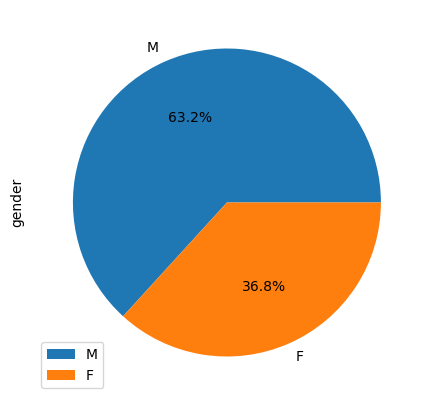

In [6]:
gender_counts = dataframe['gender'].value_counts()
df2 = pd.DataFrame({"gender": gender_counts}, index=['M', 'F'])
df2.plot.pie(y='gender', figsize=(5,5), autopct='%1.1f%%')

In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(dataframe[["gender"]])
new_cols_df = pd.DataFrame(oe_results.toarray(), columns=ohe.categories_[0]).astype(np.int64)
new_cols_df

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
13387,0,1
13388,0,1
13389,0,1
13390,1,0


Pol je One-hot enkodiran.

In [8]:
dataframe=dataframe.drop('gender', axis=1)

In [9]:
dataframe.insert(1, 'M',new_cols_df['M'])
dataframe.insert(2, 'F',new_cols_df['F'])
dataframe

,age,M,F,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25.0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13388,21.0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13389,39.0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13390,64.0,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


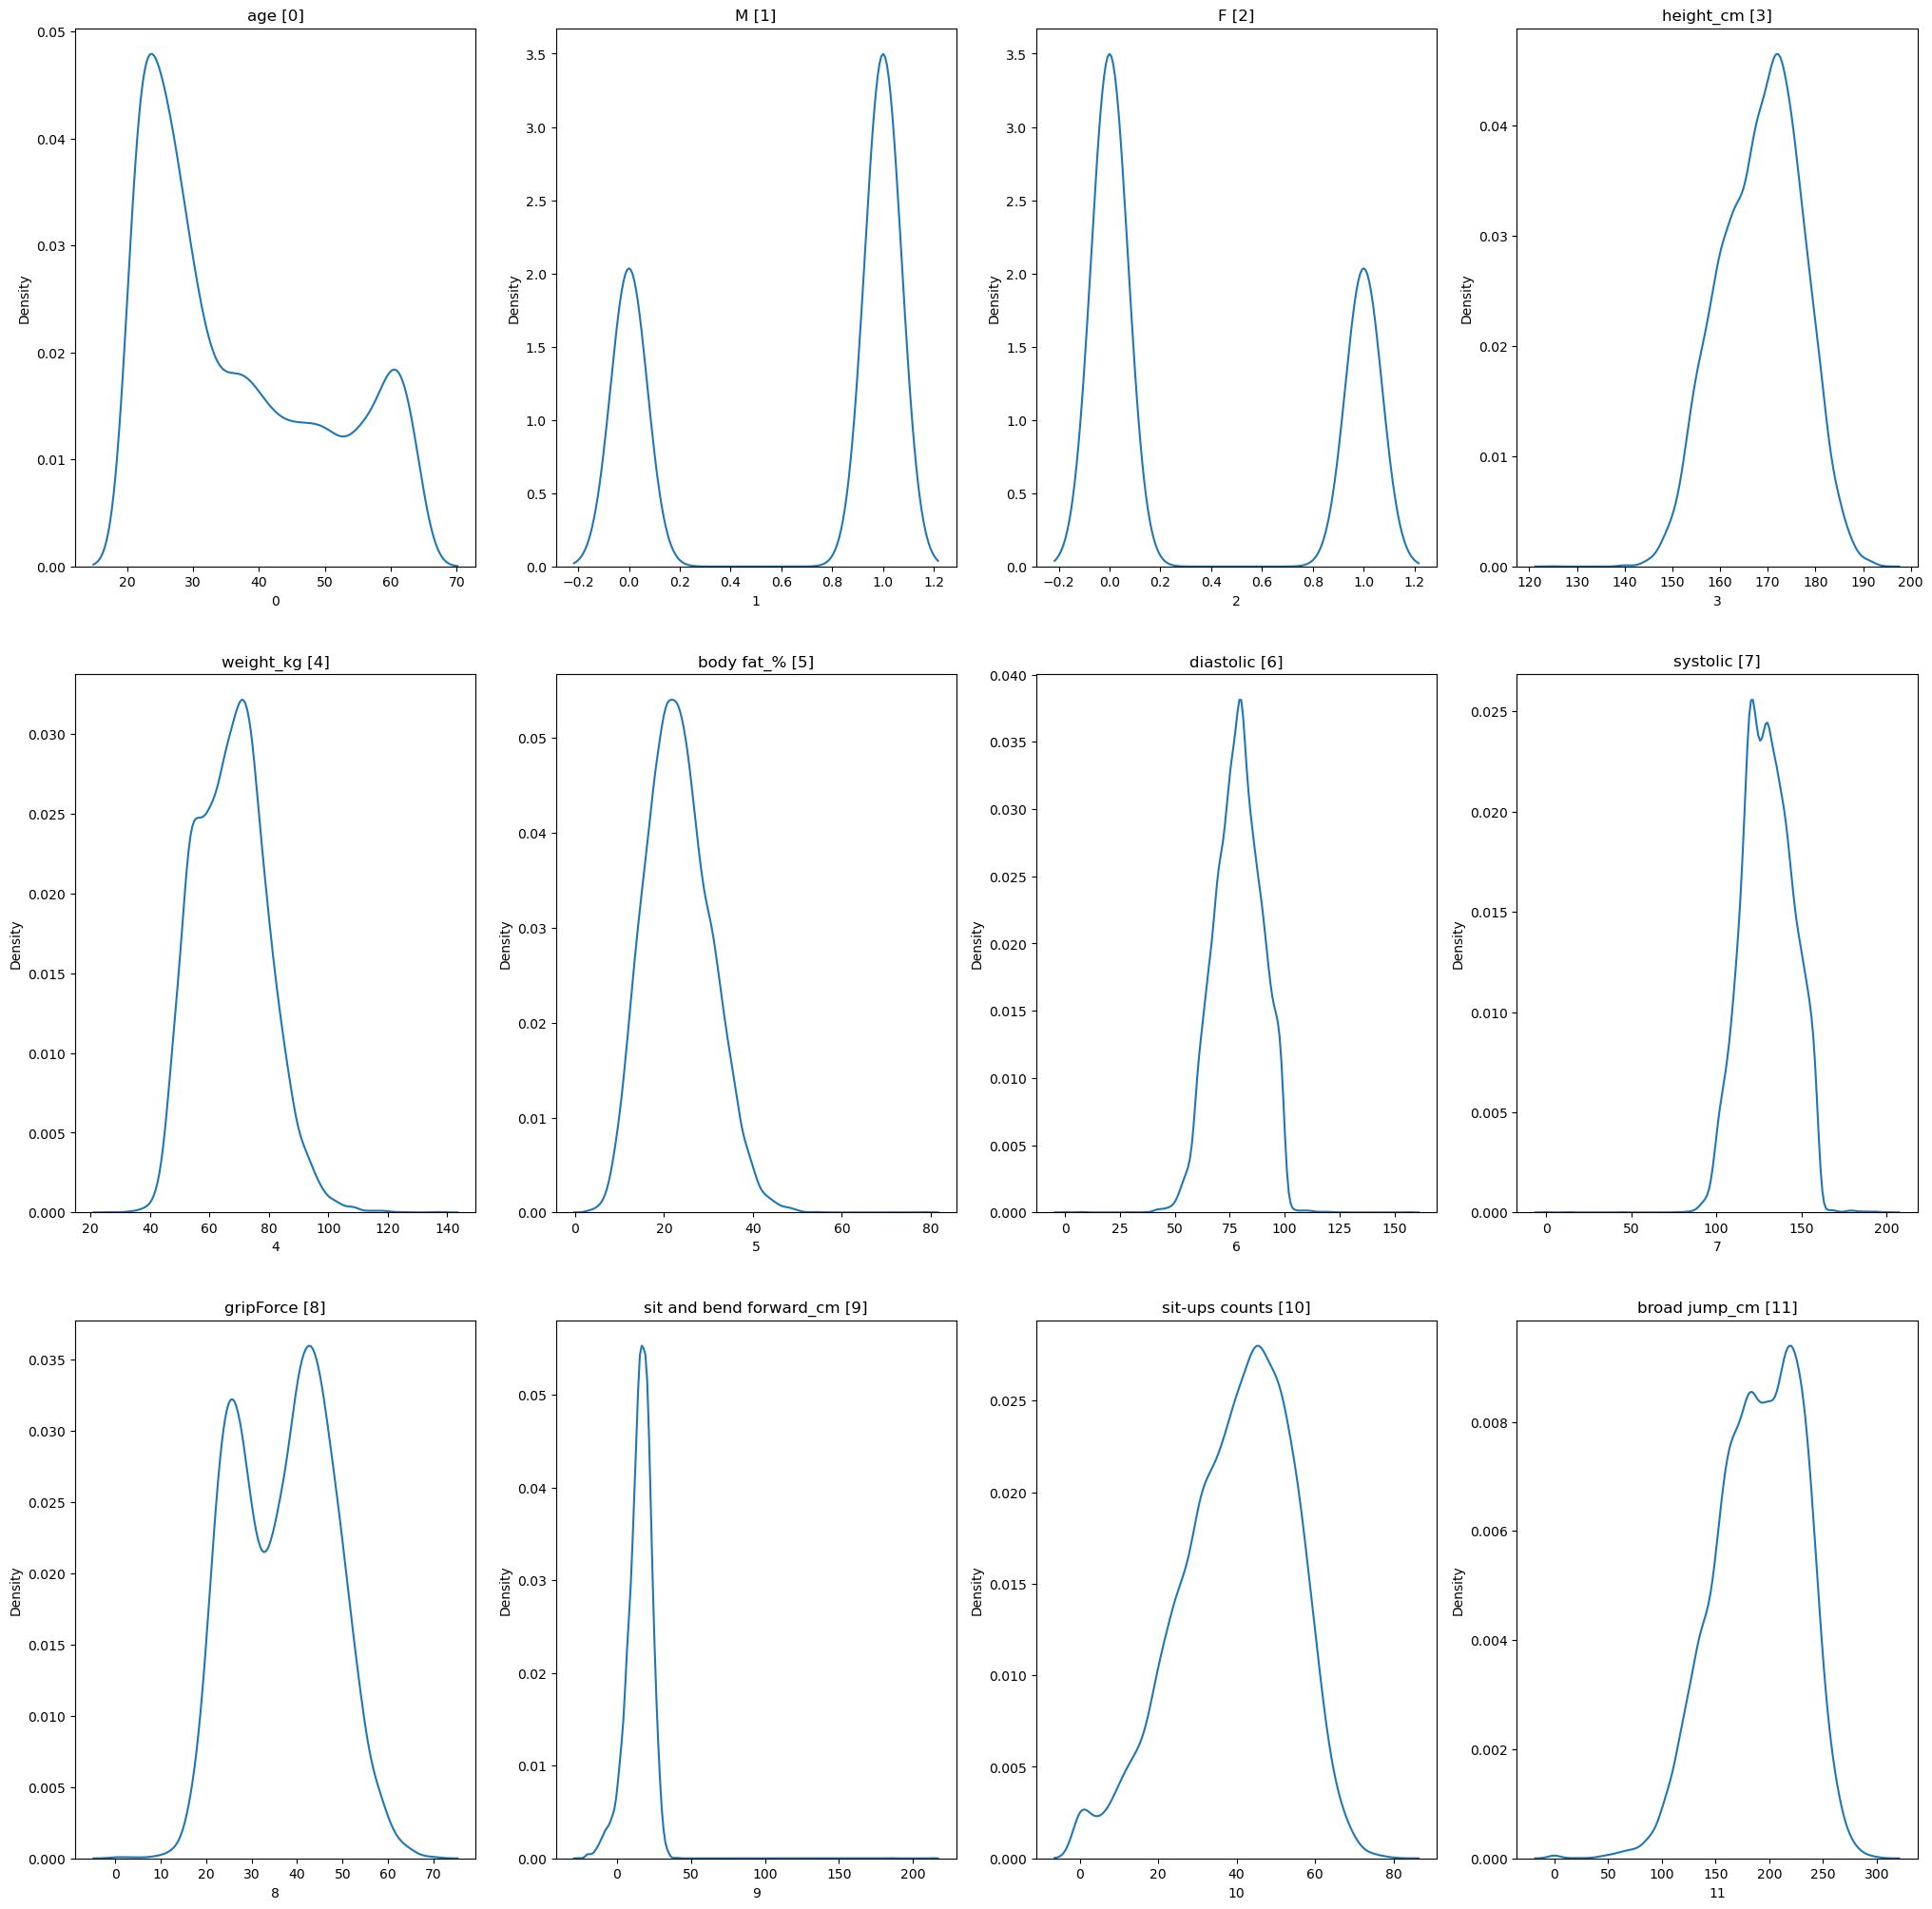

In [10]:
df = dataframe.drop(['class'], axis=1)
potential_features_to_show = df.to_numpy()

mod_df = pd.DataFrame(potential_features_to_show)
fig, axs = plt.subplots(3,4, figsize=(25,25))
for i in range(3):
    for j in range(4):
        sns.kdeplot(mod_df[4*i+j], ax=axs[i][j])
        axs[i][j].set_title('{} [{}]'.format(df.columns[4*i+j],4*i+j))
plt.show()

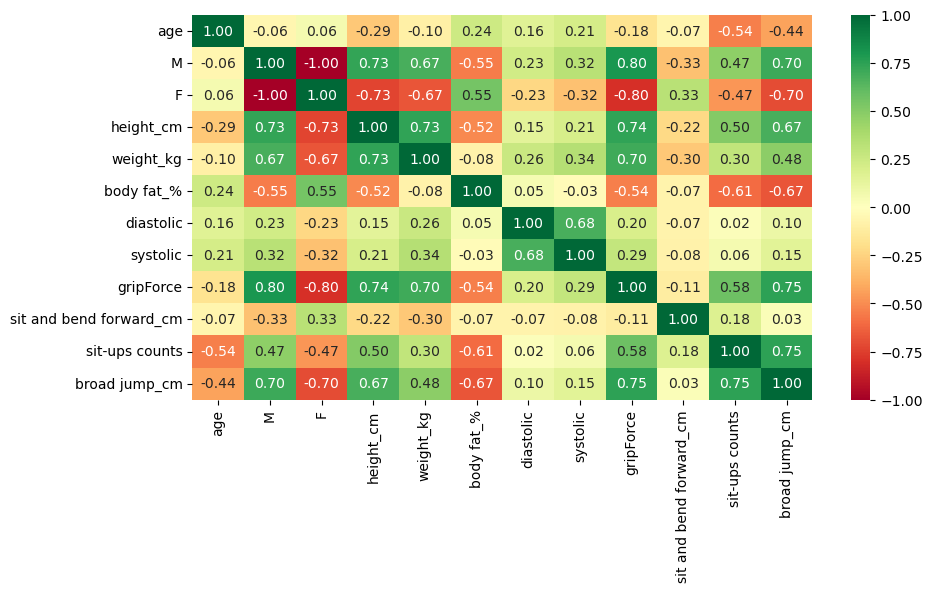

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe[dataframe.columns[:-1]].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

**Balansiranost klasa**

<AxesSubplot: ylabel='class'>

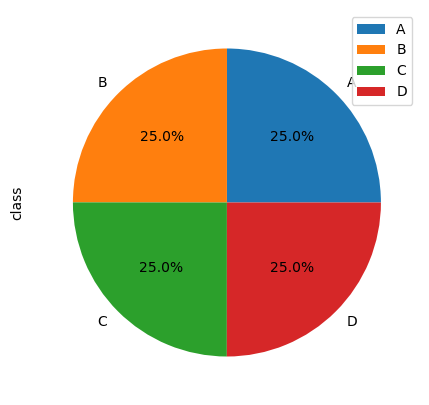

In [12]:
class_counts = dataframe['class'].value_counts()
df2 = pd.DataFrame({"class": class_counts}, index=['A', 'B', 'C', 'D'])
df2.plot.pie(y='class', figsize=(5,5), autopct='%1.1f%%')

Classes are perfectly balanced.

### 2. Descriptive analysis:

In [13]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,13392.0,36.775836,13.625886,21.0,25.0,32.0,48.0,64.0
M,13392.0,0.632243,0.482213,0.0,0.0,1.0,1.0,1.0
F,13392.0,0.367757,0.482213,0.0,0.0,0.0,1.0,1.0
height_cm,13392.0,168.560671,8.426305,125.0,162.4,169.2,174.8,193.8
weight_kg,13392.0,67.448686,11.949061,26.3,58.2,67.4,75.3,138.1
body fat_%,13392.0,23.239608,7.256829,3.0,18.0,22.8,28.0,78.4
diastolic,13392.0,78.797499,10.742165,0.0,71.0,79.0,86.0,156.2
systolic,13392.0,130.238120,14.709536,0.0,120.0,130.0,141.0,201.0
gripForce,13392.0,36.964569,10.624959,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13392.0,15.208933,8.456904,-25.0,10.9,16.2,20.7,213.0


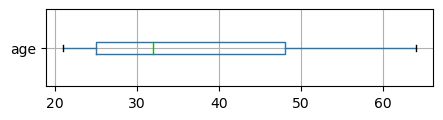

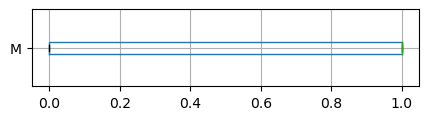

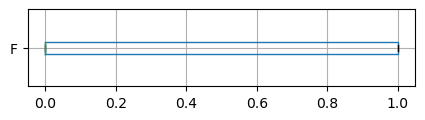

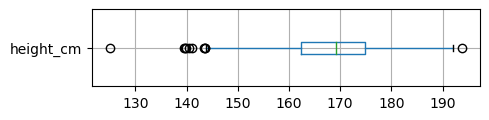

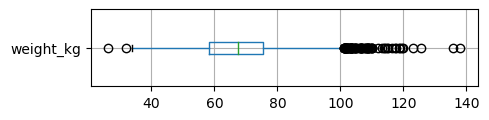

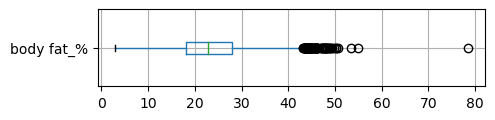

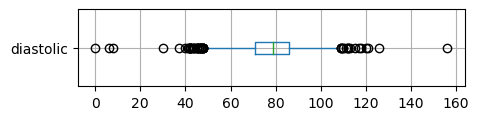

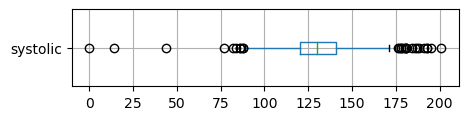

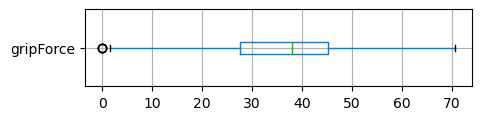

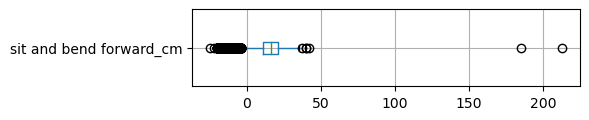

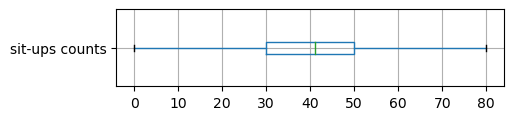

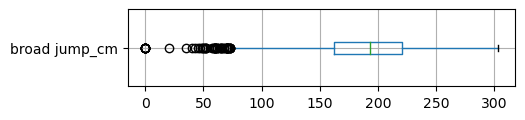

In [14]:
for i in range(dataframe.shape[1]-1):
    plt.figure(figsize=(5,1))
    dataframe.iloc[:,i:i+1].boxplot(vert=False)
    plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(dataframe[["class"]])
new_cols_df = pd.DataFrame(oe_results.toarray(), columns=ohe.categories_[0]).astype(np.int64)

dataframe = pd.concat([dataframe.drop('class', axis=1), new_cols_df], axis=1)
dataframe

,age,M,F,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,A,B,C,D
0,27.0,1,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,0,1,0
1,25.0,1,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0,0,0
2,31.0,1,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,0,1,0
3,32.0,1,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,0
4,28.0,1,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25.0,1,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,0,0,1,0
13388,21.0,1,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,0,0,0,1
13389,39.0,1,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1,0,0,0
13390,64.0,0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,0,0,1


Class is One-Hot encoded.

### 3. Naive Bayes implementation:

Helper function for calculating probability:

In [29]:
def f(fi, mi, teta):
    rez=np.exp((-(fi-mi)**2)/(2*teta**2))/(teta*np.sqrt(2*np.pi))
    return rez

Data preparation:

In [18]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
norm = Normalizer()

features = dataframe.drop(['A','B','C','D'], axis=1).to_numpy()
target = dataframe.iloc[:, -4:].to_numpy()

standardized = scaler.fit_transform(features)
normalized = norm.fit_transform(features)

trainX, testX, trainy, testy = train_test_split(standardized, target, test_size=0.3, random_state=0)
trainX_norm, testX_norm, trainy_norm, testy_norm = train_test_split(normalized, target, test_size=0.3, random_state=0)

Gaussian Naive Bayes:

In [39]:
class NaiveBayes:
    def __init__(self):
        self.features_probs=None
        self.num_of_classes=0
        self.num_of_features=0
        
    def fit(self, features, target):
        dict_of_df={}
        data=np.concatenate((features, target), axis=1)
        df=pd.DataFrame(data=data)
        for i in range(0, target.shape[1]):
            key_name = 'df_new_'+str(i)
            dict_of_df[key_name]=df[df.iloc[:,-4+i]==1]
        num_of_classes=target.shape[1]
        num_of_features=features.shape[1]
        self.num_of_classes=num_of_classes
        self.num_of_features=num_of_features
        features_std=np.zeros((num_of_features, num_of_classes))
        features_mean=np.zeros((num_of_features, num_of_classes))
        for i in range(0, num_of_features):
            for j in range(0, num_of_classes):
                key_name='df_new_'+str(j)
                features_std[i,j]=dict_of_df[key_name].iloc[:,i].std()
                features_mean[i, j]=dict_of_df[key_name].iloc[:, i].mean()
        data=np.concatenate((features, target), axis=1)
        features_probs=np.zeros((features.shape[0], num_of_features*num_of_classes))
        for i in range(0, features.shape[0]):
            row=features[i]
            for j in range(0, num_of_features):
                for k in range(0, num_of_classes):
                    features_probs[i, k+num_of_classes*j]=f(row[j], features_mean[j, k], features_std[j, k])
        self.features_probs=features_probs
        
    def predict(self, features):
        pred=np.ones((features.shape[0], self.num_of_classes))
        final_pred=np.zeros(features.shape[0])
        for i in range(0, features.shape[0]):
            for j in range(0, self.num_of_features):
                for k in range(0, self.num_of_classes):
                    pred[i, k]*=features_probs[i, k+self.num_of_classes*j]
        final_pred=np.argmax(pred, axis=1)
        true=np.argmax(target, axis=1)
        return final_pred

Testiranje:

In [42]:
from sklearn.metrics import accuracy_score
model=NaiveBayes()
model.fit(features, target)
pred=model.predict(features)
true=np.argmax(target, axis=1)
accuracy_score(true, pred)

0.55055256869773

### 4. Results: 

My implementation:

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(true, final_pred)

0.55055256869773

Scikit Learn implementation:

In [86]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features, true)
y_pred=clf.predict(features)
accuracy_score(true, y_pred)

0.5504778972520908